In [1]:
import redback
from redback import filters
from corner import corner
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astroquery.svo_fps import SvoFps
import astropy.units as u

%matplotlib widget

/Users/zgl12/anaconda3/lib/python3.11/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
09:46 bilby INFO    : Running bilby version: 2.3.0
09:46 redback INFO    : Running redback version: 1.0.31


In [2]:
result = redback.result.read_in_result('/Users/zgl12/SN2019vxm_result.json')

In [3]:
df = pd.read_csv('/Users/zgl12/Modules/SN2019vxm/Data/vxm_collated_data.csv')
df['band'] = np.nan

filterss = df['Svo_filter'].unique()


filter_table_master = SvoFps.get_filter_index(500*u.Angstrom, 12000*u.Angstrom, timeout = 400).to_pandas()

filter_table = filter_table_master[filter_table_master['filterID'].isin(filterss)]

filter_table = filter_table_master[filter_table_master['filterID'].isin(filterss)]

filter_table = filter_table.reset_index(drop=True)

df

filter_label = [f"{x.split('/')[0]}::" + x.split('/')[1].split('.')[1] for x in filter_table['filterID']]

plot_label   = [x.split('_')[0] for x in filter_table['filterID']]

_ = [filters.add_filter_svo(filter_table.iloc[ii], filter_label[ii], plot_label[ii]) for ii in range(len(filter_table))]

In [9]:
result.posterior

df = result.posterior.drop(columns=['t0', 'redshift', 'log_likelihood', 'log_prior'])

df

,mej,csm_mass,vej,eta,rho,r0,kappa,temperature_floor,av
0,99.951401,0.532722,8535.886541,1.973979,4.232309e-13,50.014770,1.999870,4822.029391,0.193734
1,99.787398,0.534956,8551.502742,1.975151,4.240435e-13,50.044560,1.997214,4852.230609,0.205125
2,99.999361,0.534597,8520.071912,1.974492,4.259905e-13,50.029050,1.998941,4849.355085,0.198861
3,99.581277,0.534437,8538.176430,1.975053,4.242771e-13,50.022013,1.998691,4838.464989,0.195114
4,99.682331,0.537468,8539.413737,1.972249,4.214390e-13,50.001326,1.997996,4826.850225,0.203022
...,...,...,...,...,...,...,...,...,...
11781,99.991038,0.533696,8561.035884,1.977292,4.280751e-13,50.001175,1.999774,4844.216486,0.202870
11782,99.996162,0.534131,8559.260257,1.977459,4.280508e-13,50.021707,1.999956,4840.707817,0.202122
11783,99.994982,0.533399,8552.133658,1.977175,4.282372e-13,50.005206,1.999940,4843.478675,0.200464
11784,99.991441,0.534100,8554.800104,1.977507,4.286315e-13,50.003186,1.999906,4840.479574,0.200439


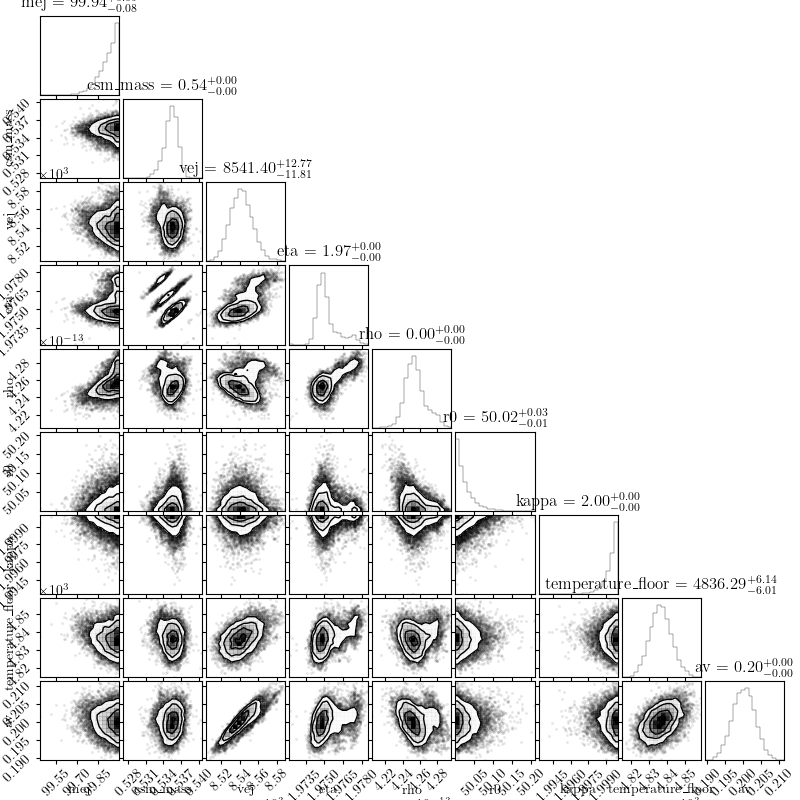

In [10]:
fig = corner(df.values, labels=df.columns, show_titles=True)
fig.set_size_inches(8, 8)  # Width, Height in inches

In [ ]:
for col in df.columns:
    arr = df[col].values
    med = np.nanmedian(arr)
    # print(f"{col}: {med}")
    
    print(f"{col}")
    print(f"${np.nanmedian(arr):.2f}" + "^{+" + f"{abs(np.nanpercentile(arr, 84) - np.nanmedian(arr)):.2f}" + "}" + "_{-" + f"{abs(np.nanmedian(arr) - np.nanpercentile(arr, 16)):.2f}" + "}$")